In [1]:
from __future__ import division
import math
import csv
import ast
import matplotlib.pylab as plt
import seaborn as sns
from random import shuffle
from IPython.display import Image

import os
import sys
sys.path.append(os.getcwd()+'/../code')

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
#header supplier,supplierRevPercent,customerCogPercent,amount
with open('../data/supplychain.csv') as f:
    reader = csv.reader(f)
    data = [[line[0], float(line[1]), float(line[2]), float(line[3])] for line in reader]

In [3]:
data

[['Cowell', 77.7, 0.49, 172.2],
 ['Cirrus Logic', 76.0, 0.58, 264.38],
 ['Multi-Fineline E', 75.0, 0.34, 119.36],
 ['Dialog Semicond', 71.27, 0.76, 235.48],
 ['Nissha Printing', 53.7, 1.56, 520.27],
 ['Pegatron', 52.98, 16.6, 4899.69],
 ['Hon Hai Precisio', 51.92, 56.0, 16532.08],
 ['Glu Mobile', 51.7, 0.11, 32.7],
 ['Flexium Intercon', 49.41, 0.23, 68.29],
 ['Simplo Technolog', 46.87, 0.74, 224.19],
 ['Colopl', 44.7, 0.19, 66.86],
 ['Dynapack Interna', 43.91, 0.24, 73.96],
 ['Japan Display', 41.8, 7.85, 2593.54],
 ['Qorvo', 41.73, 0.95, 295.57],
 ['Genius Electroni', 41.47, 0.1, 30.96],
 ['Klab', 40.3, 0.07, 18.09],
 ['Casetek Holdings', 40.11, 0.3, 103.64],
 ['Tpk Holding', 40.08, 1.07, 377.03],
 ['Aiming', 38.8, 0.02, 4.44],
 ['Gumi', 37.1, 0.07, 20.53],
 ['Foster Electric', 36.8, 1.7, 562.43],
 ['Aac Technologies', 35.66, 0.43, 127.61],
 ['Gameloft Se', 34.7, 0.08, 24.6],
 ['Lg Display', 30.84, 6.11, 1887.59],
 ['Invensense', 30.0, 0.09, 27.9],
 ['Zhen Ding Techno', 29.14, 0.66, 19

# Data Visualization

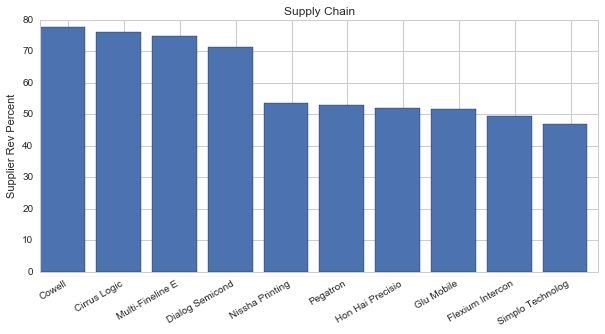

In [4]:
num = 10
tgt_idx = 1

data.sort(key = lambda row: row[tgt_idx], reverse=True)

x = [i for i, _ in enumerate(data[:num])]
y = [i[tgt_idx] for i in data[:num]]
labels = [i[0] for i in data[:num]]
label_pos = [i + 0.5 for i in x]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
plt.bar(x, y)
plt.ylabel("Supplier Rev Percent")
plt.title("Supply Chain")
plt.xticks(label_pos, labels)

fig.autofmt_xdate()
plt.show()

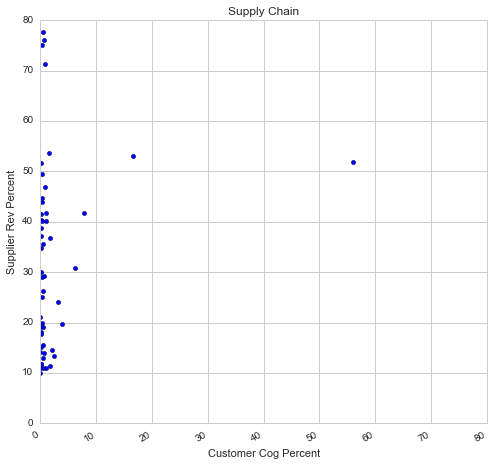

In [5]:
tgt_idx = 1

data.sort(key = lambda row: row[tgt_idx], reverse=True)

x = [i[tgt_idx+1] for i in data]
y = [i[tgt_idx] for i in data]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
plt.scatter(x, y)
plt.ylabel("Supplier Rev Percent")
plt.xlabel("Customer Cog Percent")
plt.title("Supply Chain")

fig.autofmt_xdate()
plt.axis((0,80,0,80))
plt.show()

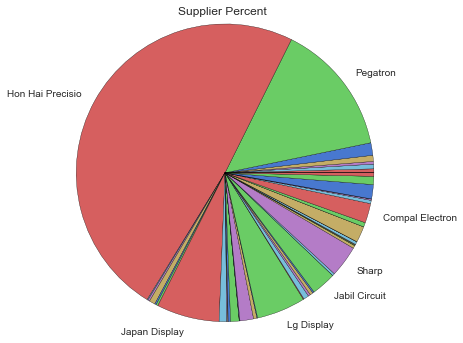

In [6]:
tgt_idx = 2


x = [i[tgt_idx] / sum(x) for i in data]
mean = sum(x) / len(x)
labels = [v[0] if x[i] > mean else '' for i, v in enumerate(data)]
colors = sns.color_palette("muted")
shuffle(colors)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
plt.pie(x, labels=labels, colors=colors)
plt.axis("equal")
plt.title("Supplier Percent")
fig.autofmt_xdate()
plt.show()

# Linear Algebra

In [25]:
import linear_algebra as la

In [30]:
v = [1,2]
w = [3,1]

In [31]:
la.dot(v, w)

5

In [32]:
la.vector_add(v, w)

[4, 3]

# Statistics

In [7]:
import stats

In [15]:
amounts = [i[3] for i in data]

In [16]:
stats.mean(amounts)

695.5966666666667

In [18]:
stats.de_mean([1,2,3,4,5])

[-2.0, -1.0, 0.0, 1.0, 2.0]

In [9]:
stats.median(amounts)

104.77

In [21]:
stats.interquartile_range(amounts)

329.6

In [10]:
stats.quantile(amounts, 0.75)

357.5

In [13]:
stats.mode([1,1,2,2,3])

[1, 2]

In [14]:
stats.data_range(amounts)

16531.81

In [19]:
stats.variance(amounts)

5657273.009269282

In [20]:
stats.standard_deviation(amounts)

2378.5022617751033

In [23]:
supp_rev = [i[1] for i in data]
cust_cog = [i[2] for i in data]

stats.covariance(supp_rev, cust_cog)

29.060885294117647

In [24]:
stats.correlation(supp_rev, cust_cog)

0.19721921360955744